In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


In [3]:
import os
os.getcwd()

'C:\\Users\\kruti\\Downloads'

In [54]:
#loading dataset
wine = pd.read_csv('winequality-red.csv')

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


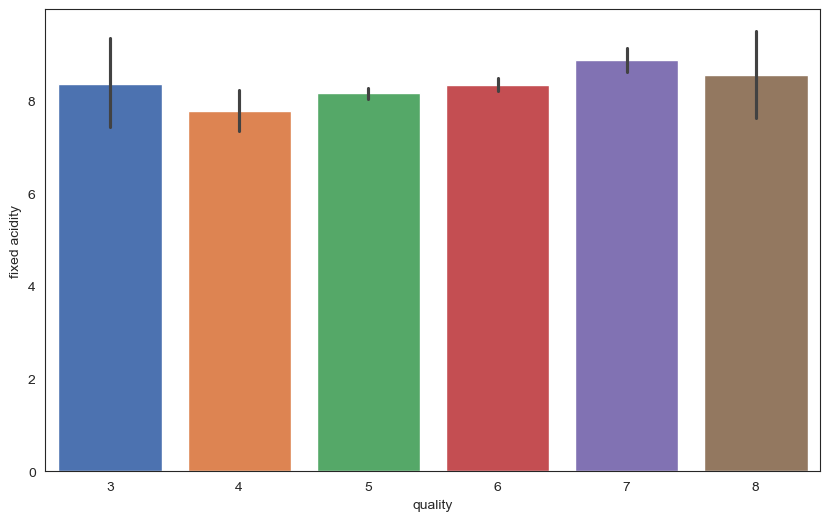

In [39]:
fig = plt.figure(figsize = (10,6))
plt.clf()
sns.set_style("white")
ax = sns.barplot(x = 'quality' , y = 'fixed acidity', data = wine, hue = 'quality', palette = 'deep',saturation=1, legend = False)
plt.show()

In [55]:
wine['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [56]:
#making binary classification for response variable
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins , labels = group_names ) 

In [57]:
labelquality = LabelEncoder()

In [58]:
wine['quality'] = labelquality.fit_transform(wine['quality'])

In [69]:
wine['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [71]:
wine['quality'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    0
Name: quality, dtype: int64

In [72]:
print(wine['quality'].value_counts(dropna=False))
print(wine['quality'].isna().sum())

quality
0    1382
1     217
Name: count, dtype: int64
0


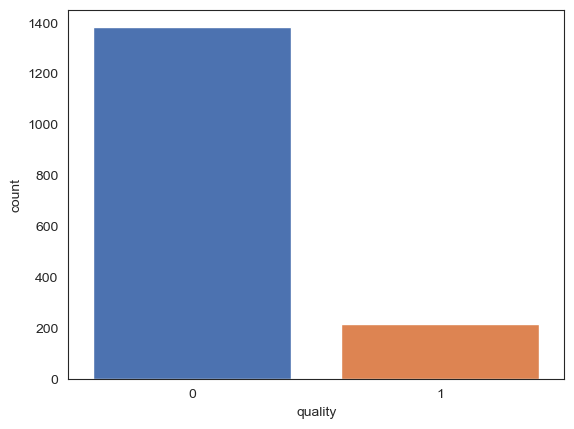

In [73]:
ax = sns.countplot(x='quality', data=wine, 
                   hue='quality', palette='deep', legend=False, saturation=1)
# No output text, plot shows normally
plt.show()

In [74]:

#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [76]:
sc = StandardScaler()


In [77]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [78]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [79]:
print(classification_report(y_test, pred_rfc))


              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.75      0.51      0.61        47

    accuracy                           0.90       320
   macro avg       0.84      0.74      0.78       320
weighted avg       0.90      0.90      0.90       320



In [80]:
print(confusion_matrix(y_test, pred_rfc))


[[265   8]
 [ 23  24]]


In [81]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [82]:
print(classification_report(y_test, pred_sgd))


              precision    recall  f1-score   support

           0       0.92      0.93      0.93       273
           1       0.57      0.53      0.55        47

    accuracy                           0.87       320
   macro avg       0.74      0.73      0.74       320
weighted avg       0.87      0.87      0.87       320



In [83]:
print(confusion_matrix(y_test, pred_sgd))


[[254  19]
 [ 22  25]]


In [84]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [85]:
print(classification_report(y_test, pred_svc))


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.38        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [86]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [87]:
grid_svc.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [88]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [89]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.85      0.36      0.51        47

    accuracy                           0.90       320
   macro avg       0.88      0.68      0.72       320
weighted avg       0.89      0.90      0.88       320



In [91]:
print(confusion_matrix(y_test, pred_svc2))


[[270   3]
 [ 30  17]]


In [90]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

np.float64(0.9147945374015748)

In [92]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [94]:
wine.value_counts(['quality'])

quality
0          1382
1           217
Name: count, dtype: int64

In [95]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 42, stratify = y )

In [112]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [113]:
print(isinstance(y_train, pd.Series))      # True if it's a Series

True


In [114]:
print(y_train.ndim)
print(y_train.shape)

1
(1279,)


In [115]:
from imblearn.over_sampling import SMOTE

In [116]:
#apply SMOTE only on training data
smote = SMOTE(random_state = 42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train.values.ravel())

In [117]:
print(pd.Series(y_train_res).value_counts())

0    1105
1    1105
Name: count, dtype: int64


In [118]:
grid_svc.fit(X_train_res, y_train_res)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [119]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.8, 'kernel': 'rbf'}

In [120]:
#Let's run our SVC again with the best parameters.
svc3 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc3.fit(X_train, y_train)
pred_svc3 = svc3.predict(X_test)
print(classification_report(y_test, pred_svc3))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       277
           1       0.93      0.30      0.46        43

    accuracy                           0.90       320
   macro avg       0.92      0.65      0.70       320
weighted avg       0.91      0.90      0.88       320

